In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [5]:
# 1. LOAD THE DATA
df = pd.read_csv('Global_Cybersecurity_Threats_2015-2024.csv')


In [6]:
# 2. BASIC DATA EXPLORATION
print(f"Shape: {df.shape}")
print(f"\nMissing Values:\n{df.isnull().sum()}")
df.head()

Shape: (3000, 10)

Missing Values:
Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


Text(0.5, 1.0, 'Distribution of Financial Loss')

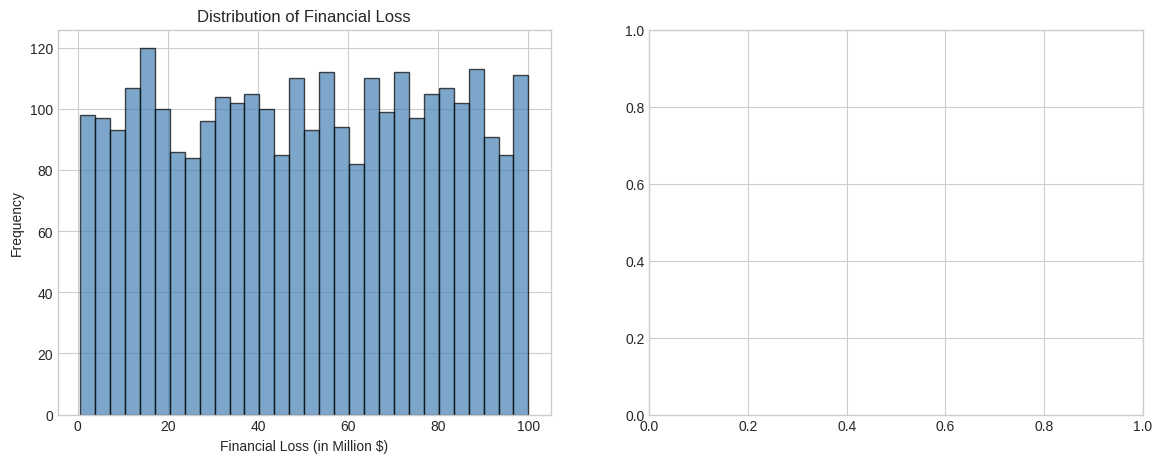

In [8]:
# 3. VISUALIZATIONS
# ============================================

# --- Figure 1: Distribution of Target Variable (Financial Loss) ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Histogram
axes[0].hist(df['Financial Loss (in Million $)'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Financial Loss (in Million $)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Financial Loss')

In [13]:
# Box plot
axes[1].boxplot(df['Financial Loss (in Million $)'], vert=True)
axes[1].set_ylabel('Financial Loss (in Million $)')
axes[1].set_title('Box Plot of Financial Loss')

plt.tight_layout()
plt.savefig('financial_loss_distribution.png', dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

In [14]:
# Select numerical columns
numerical_cols = ['Year', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']
correlation_matrix = df[numerical_cols].corr()

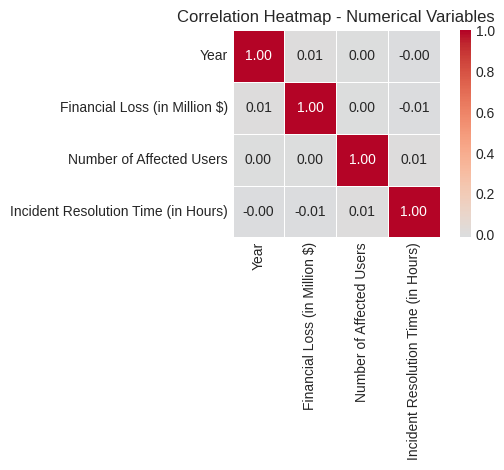

In [15]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Heatmap - Numerical Variables')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()

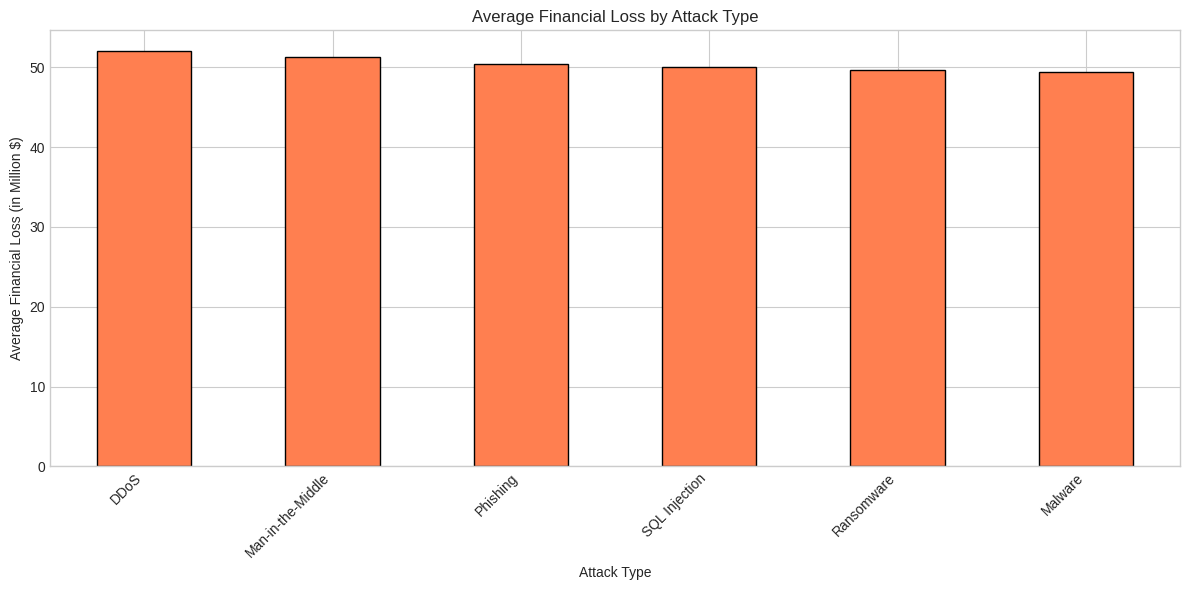

In [16]:
# --- Figure 3: Financial Loss by Attack Type ---
plt.figure(figsize=(12, 6))
attack_impact = df.groupby('Attack Type')['Financial Loss (in Million $)'].mean().sort_values(ascending=False)
attack_impact.plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel('Attack Type')
plt.ylabel('Average Financial Loss (in Million $)')
plt.title('Average Financial Loss by Attack Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('loss_by_attack_type.png', dpi=300)
plt.show()

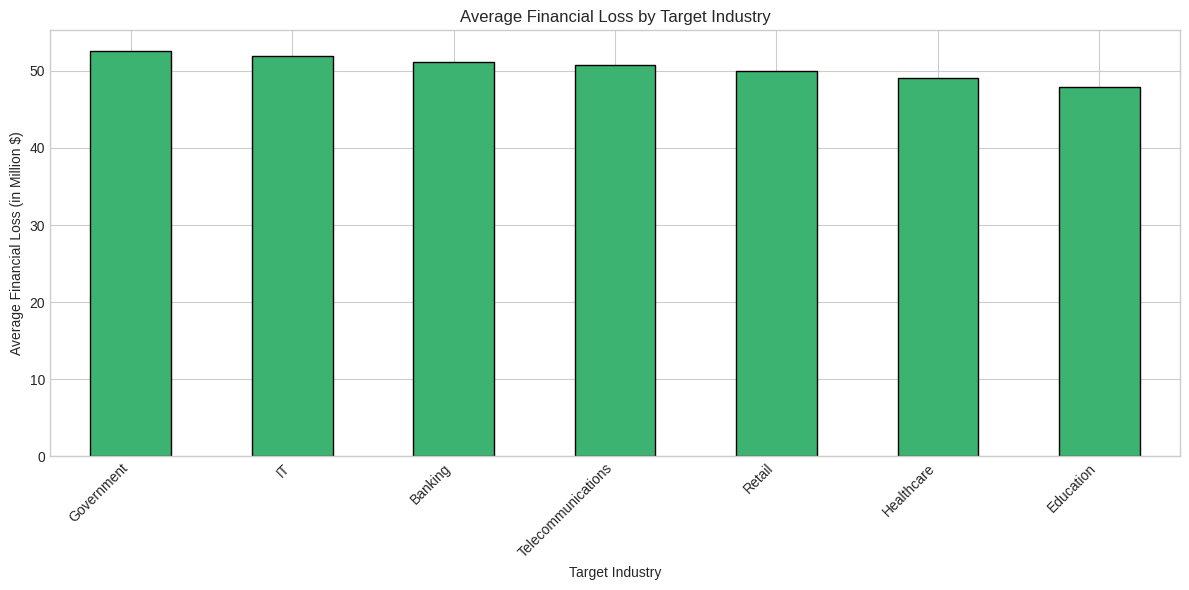

In [17]:
# --- Figure 4: Financial Loss by Target Industry ---
plt.figure(figsize=(12, 6))
industry_impact = df.groupby('Target Industry')['Financial Loss (in Million $)'].mean().sort_values(ascending=False)
industry_impact.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.xlabel('Target Industry')
plt.ylabel('Average Financial Loss (in Million $)')
plt.title('Average Financial Loss by Target Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('loss_by_industry.png', dpi=300)
plt.show()

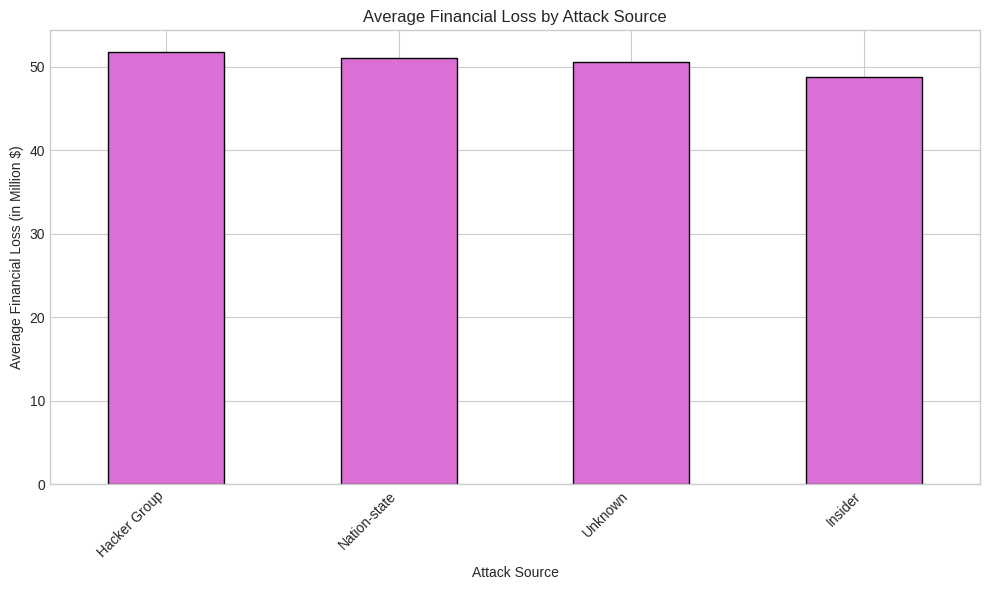

In [18]:
# --- Figure 5: Financial Loss by Attack Source ---
plt.figure(figsize=(10, 6))
source_impact = df.groupby('Attack Source')['Financial Loss (in Million $)'].mean().sort_values(ascending=False)
source_impact.plot(kind='bar', color='orchid', edgecolor='black')
plt.xlabel('Attack Source')
plt.ylabel('Average Financial Loss (in Million $)')
plt.title('Average Financial Loss by Attack Source')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('loss_by_source.png', dpi=300)
plt.show()

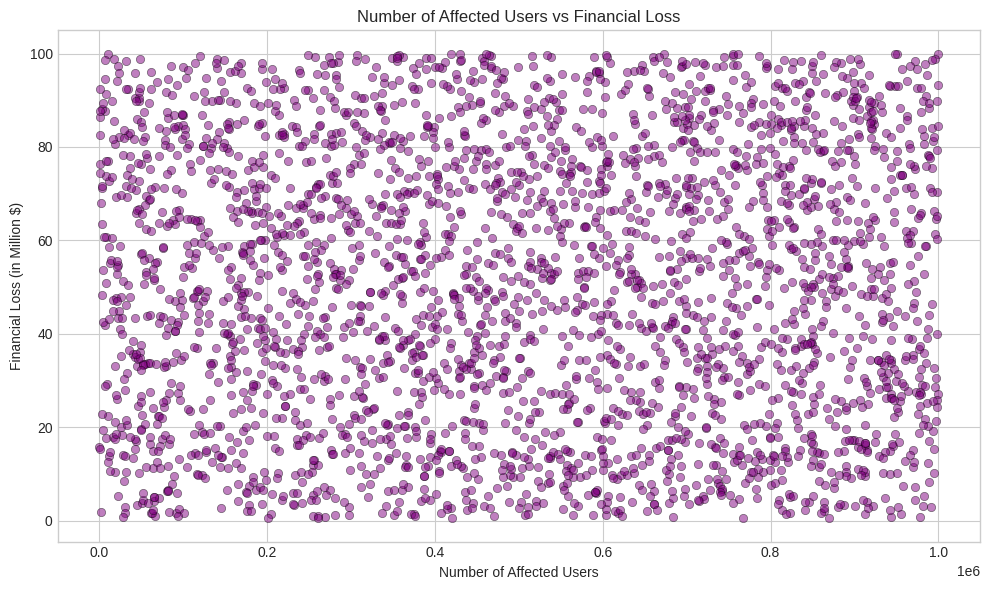

In [19]:
# --- Figure 6: Scatter Plot - Affected Users vs Financial Loss ---
plt.figure(figsize=(10, 6))
plt.scatter(df['Number of Affected Users'], df['Financial Loss (in Million $)'], 
            alpha=0.5, c='purple', edgecolors='black', linewidth=0.5)
plt.xlabel('Number of Affected Users')
plt.ylabel('Financial Loss (in Million $)')
plt.title('Number of Affected Users vs Financial Loss')
plt.tight_layout()
plt.savefig('users_vs_loss.png', dpi=300)
plt.show()

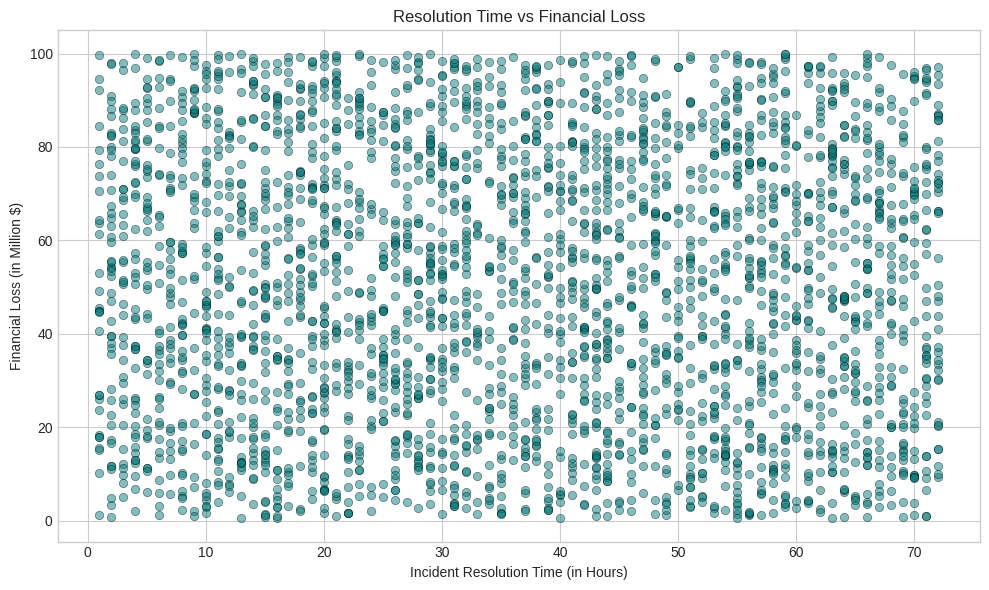

In [20]:
# --- Figure 7: Scatter Plot - Resolution Time vs Financial Loss ---
plt.figure(figsize=(10, 6))
plt.scatter(df['Incident Resolution Time (in Hours)'], df['Financial Loss (in Million $)'], 
            alpha=0.5, c='teal', edgecolors='black', linewidth=0.5)
plt.xlabel('Incident Resolution Time (in Hours)')
plt.ylabel('Financial Loss (in Million $)')
plt.title('Resolution Time vs Financial Loss')
plt.tight_layout()
plt.savefig('resolution_vs_loss.png', dpi=300)
plt.show()

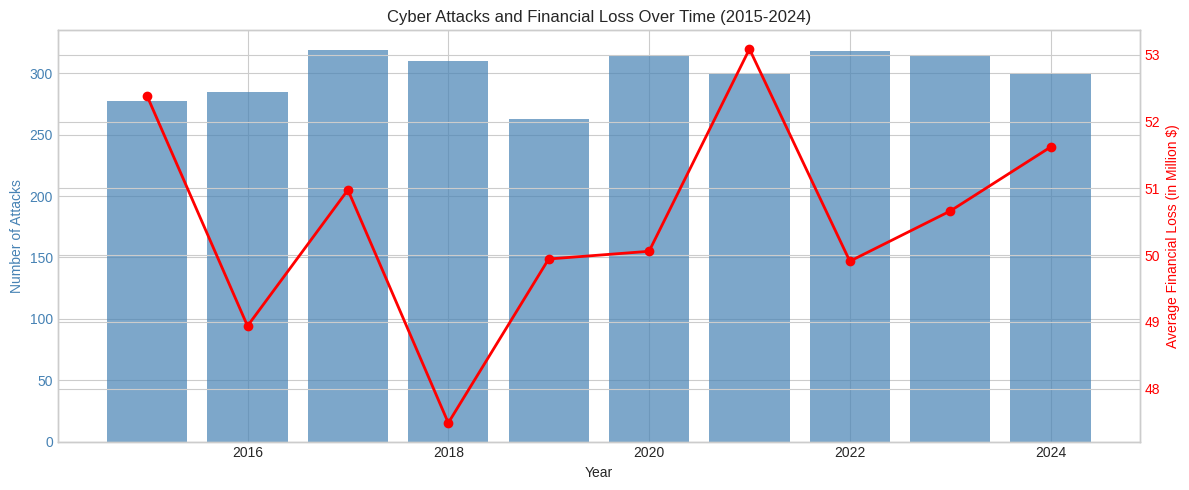

In [21]:
# --- Figure 8: Attacks Over Time ---
fig, ax1 = plt.subplots(figsize=(12, 5))

yearly_stats = df.groupby('Year').agg({
    'Financial Loss (in Million $)': 'mean',
    'Country': 'count'
}).rename(columns={'Country': 'Number of Attacks'})

ax1.bar(yearly_stats.index, yearly_stats['Number of Attacks'], alpha=0.7, color='steelblue', label='Number of Attacks')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Attacks', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

ax2 = ax1.twinx()
ax2.plot(yearly_stats.index, yearly_stats['Financial Loss (in Million $)'], color='red', marker='o', linewidth=2, label='Avg Financial Loss')
ax2.set_ylabel('Average Financial Loss (in Million $)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Cyber Attacks and Financial Loss Over Time (2015-2024)')
plt.tight_layout()
plt.savefig('attacks_over_time.png', dpi=300)
plt.show()

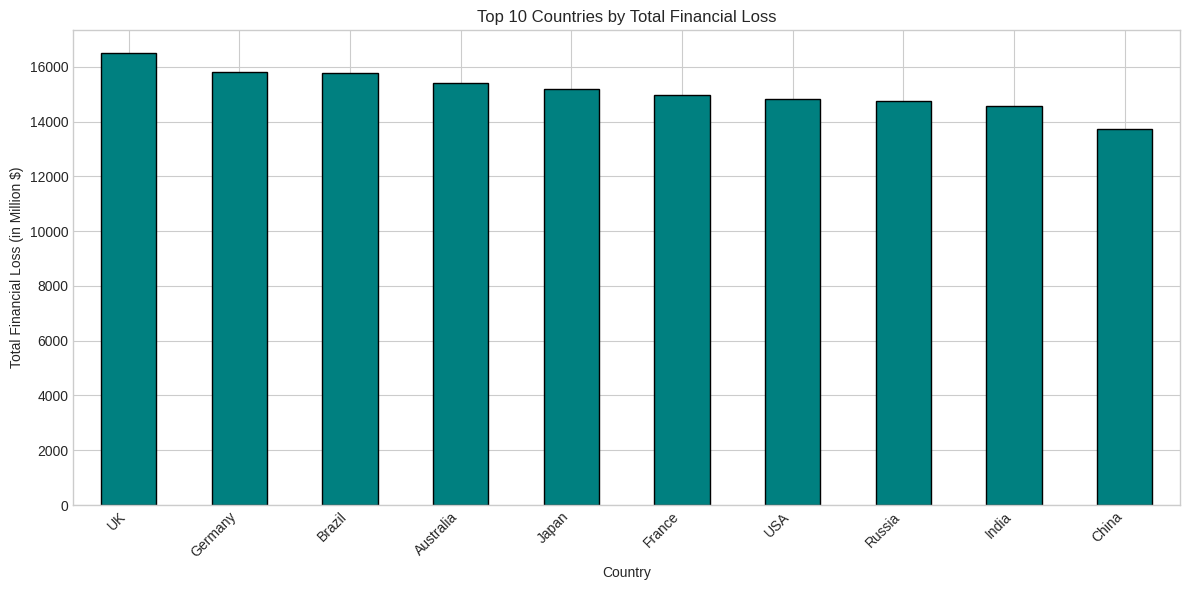

In [22]:
# --- Figure 9: Top 10 Countries by Financial Loss ---
plt.figure(figsize=(12, 6))
country_impact = df.groupby('Country')['Financial Loss (in Million $)'].sum().sort_values(ascending=False).head(10)
country_impact.plot(kind='bar', color='teal', edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Total Financial Loss (in Million $)')
plt.title('Top 10 Countries by Total Financial Loss')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_countries_loss.png', dpi=300)
plt.show()

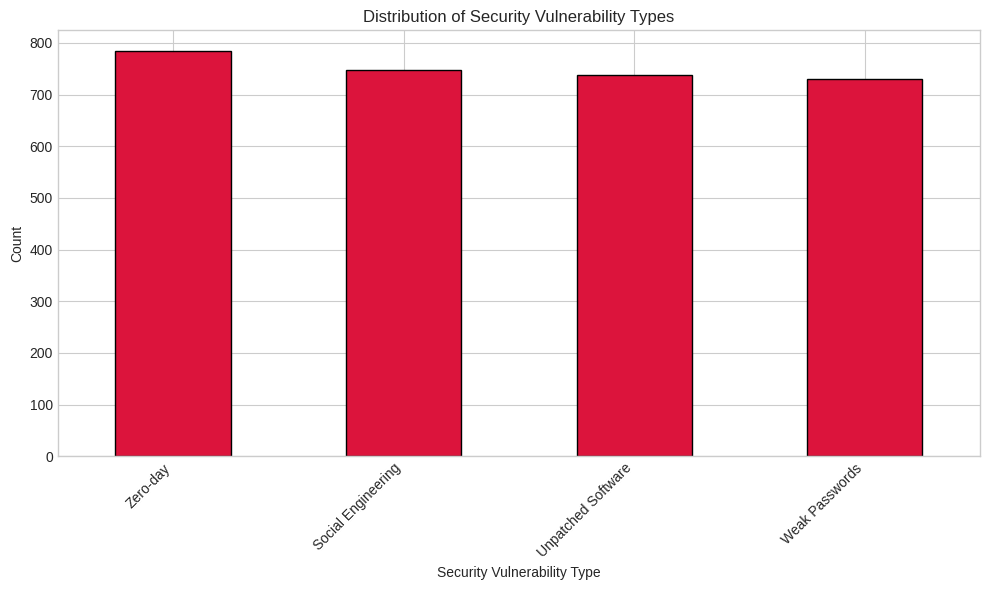

In [23]:
# --- Figure 10: Security Vulnerability Type Distribution ---
plt.figure(figsize=(10, 6))
vuln_counts = df['Security Vulnerability Type'].value_counts()
vuln_counts.plot(kind='bar', color='crimson', edgecolor='black')
plt.xlabel('Security Vulnerability Type')
plt.ylabel('Count')
plt.title('Distribution of Security Vulnerability Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('vulnerability_distribution.png', dpi=300)
plt.show()

In [24]:
# 4. KEY INSIGHTS SUMMARY
# ============================================
print(f"Average Financial Loss: ${df['Financial Loss (in Million $)'].mean():.2f}M")
print(f"Most Common Attack Type: {df['Attack Type'].mode()[0]}")
print(f"Most Targeted Industry: {df['Target Industry'].mode()[0]}")


Average Financial Loss: $50.49M
Most Common Attack Type: DDoS
Most Targeted Industry: IT
